In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import collections as col

'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

Score is either 1 (for positive) or 0 (for negative)

In [4]:
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t", names=['rev','positive'])
pd.set_option('display.max_colwidth', -1)
df[df.positive==0].head(5)

,rev,positive
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
5,I have to jiggle the plug to get it to line up right to get decent volume.,0
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0
8,"Needless to say, I wasted my money.",0


To choose features, I used the below to identify the most common words and experimented with different combinations. 

In [7]:
#list the most common words
col.Counter(" ".join(df["rev"]).split()).most_common(100)

[('the', 414),
 ('and', 307),
 ('I', 303),
 ('is', 238),
 ('a', 207),
 ('to', 195),
 ('it', 176),
 ('this', 143),
 ('my', 130),
 ('of', 117),
 ('for', 114),
 ('phone', 110),
 ('with', 106),
 ('The', 97),
 ('not', 91),
 ('was', 87),
 ('on', 86),
 ('in', 84),
 ('very', 80),
 ('have', 72),
 ('that', 71),
 ('It', 61),
 ('good', 53),
 ('This', 53),
 ('you', 52),
 ('had', 43),
 ('as', 42),
 ('but', 41),
 ('are', 40),
 ('has', 33),
 ('great', 33),
 ('one', 32),
 ('sound', 32),
 ('quality', 32),
 ('from', 32),
 ('your', 32),
 ('so', 32),
 ('it.', 31),
 ('Great', 30),
 ('would', 30),
 ('like', 30),
 ('headset', 29),
 ('phone.', 28),
 ("I've", 28),
 ('works', 28),
 ('than', 27),
 ('battery', 27),
 ('all', 27),
 ('use', 27),
 ('be', 25),
 ('recommend', 24),
 ('product', 24),
 ('-', 24),
 ('or', 23),
 ('at', 23),
 ('work', 23),
 ('get', 22),
 ('really', 22),
 ('up', 21),
 ('when', 20),
 ('out', 20),
 ('product.', 20),
 ('only', 20),
 ("I'm", 20),
 ('am', 20),
 ('no', 19),
 ('me', 19),
 ('ear', 19)

**It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:**

- Do any of your classifiers seem to overfit?    
- Which seem to perform the best? Why?    
- Which features seemed to be most impactful to performance?

# Trying to predict negative reviews

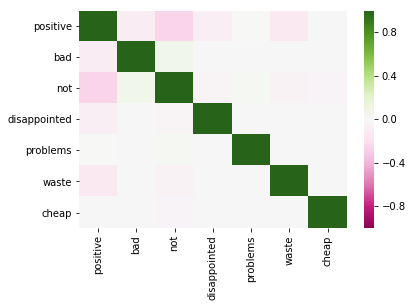

In [5]:
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t", names=['rev','positive'])
dfn = pd.DataFrame(df)

key_neg = ['bad', 'not', 'disappointed', 'problems', 'waste', 'cheap']

for key in key_neg:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    dfn[str(key)] = dfn.rev.str.contains(
        ' ' + str(key),
        case=False
    )
sns.heatmap(dfn.corr(), vmin=-1, cmap="PiYG")
plt.show()

dfn['positive'] = (dfn.positive == 1)

In [17]:
inputn = dfn[key_neg]
goaln = dfn['positive']

neg = BernoulliNB()

neg.fit(inputn, goaln)

n_pred = neg.predict(inputn)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    inputn.shape[0],
    (goaln != n_pred).sum()
))



Number of mislabeled points out of a total 1000 points : 394


# Evaluate the negative classifier

In [21]:
confusion_matrix(goalp,n_pred)

array([[120, 380],
       [ 14, 486]], dtype=int64)

In [22]:
confusion_convention = [
    ["True Negative", "False Positive"],
    ["False Negative", "True Positive"]
]

for x in confusion_convention:
    print(x)

['True Negative', 'False Positive']
['False Negative', 'True Positive']


In [28]:
trupos = ((goalp == n_pred) & (n_pred==1)).sum()
falpos = ((goalp != n_pred) & (n_pred==1)).sum()
truneg = ((goalp == n_pred) & (n_pred==0)).sum()
falneg = ((goalp != n_pred) & (n_pred==0)).sum()

sensitivity = trupos/(trupos+falneg)
specificity = truneg/(truneg+falpos)


print("Sensitivity: Accuracy predicting negative reviews: " + str(sensitivity))
print("Specificity: Accuracy predicting positive reviews: " + str(specificity))

Sensitivity: Accuracy predicting negative reviews: 0.972
Specificity: Accuracy predicting positive reviews: 0.24


In [25]:
cross_val_score(neg, inputn, goaln, cv=5)

array([0.62 , 0.605, 0.58 , 0.595, 0.605])

# Trying to predict positive reviews

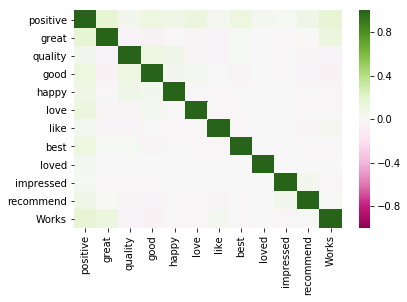

In [9]:
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t", names=['rev','positive'])
dfp = pd.DataFrame(df)

key_pos = ['great', 'quality', 'good', 'happy', 'love', 'like', 'best', 'loved', 'impressed', 'recommend', 'Works']

for key in key_pos:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    dfp[str(key)] = dfp.rev.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
sns.heatmap(dfp.corr(), vmin=-1, cmap="PiYG")
plt.show()

dfp['positive'] = (dfp.positive == 1)

In [18]:
inputp = dfp[key_pos]
goalp = dfp['positive']

pos = BernoulliNB()

pos.fit(inputp, goalp)

p_pred = pos.predict(inputp)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    inputp.shape[0],
    (goalp != p_pred).sum()
))



Number of mislabeled points out of a total 1000 points : 358


# Evaluate the positive classifier

In [19]:

confusion_matrix(goalp,p_pred)

array([[457,  43],
       [315, 185]], dtype=int64)

In [13]:
confusion_convention = [
    ["True Negative", "False Positive"],
    ["False Negative", "True Positive"]
]

for x in confusion_convention:
    print(x)

['True Negative', 'False Positive']
['False Negative', 'True Positive']


In [27]:
trupos = ((goalp == p_pred) & (p_pred==1)).sum()
falpos = ((goalp != p_pred) & (p_pred==1)).sum()
truneg = ((goalp == p_pred) & (p_pred==0)).sum()
falneg = ((goalp != p_pred) & (p_pred==0)).sum()


sensitivity = trupos/(trupos+falneg)
specificity = truneg/(truneg+falpos)

print("Sensitivity: Accuracy predicting positive reviews: " + str(sensitivity))
print("Specificity: Accuracy predicting negative reviews: " + str(specificity))

Sensitivity: Accuracy predicting positive reviews: 0.37
Specificity: Accuracy predicting negative reviews: 0.914


In [24]:
cross_val_score(pos, inputp, goalp, cv=5)

array([0.645, 0.645, 0.635, 0.63 , 0.625])

Both are similarly accurate (60-65%) overall, but for different reasons. The classifier that seeks to identify negative reviews is sensitive buy not specific, and vice versa for the classifier that seeks to identify positive reviews. 

# Next attempt: identify words that are common in only negative reviews, build out additional keywords to attempt to reduce false positives in the negative classifier

In [52]:

#Find most common words in positive reviews
col.Counter(" ".join(df[df.positive==False]["rev"]).split()).most_common(100)

[('the', 222),
 ('I', 157),
 ('and', 121),
 ('to', 110),
 ('a', 107),
 ('it', 105),
 ('is', 99),
 ('not', 78),
 ('this', 75),
 ('of', 68),
 ('my', 64),
 ('phone', 57),
 ('for', 52),
 ('The', 52),
 ('was', 52),
 ('in', 51),
 ('with', 44),
 ('on', 43),
 ('that', 42),
 ('have', 35),
 ('you', 35),
 ('had', 26),
 ('It', 24),
 ('but', 23),
 ('very', 22),
 ('as', 22),
 ('This', 21),
 ('are', 19),
 ('your', 18),
 ('it.', 18),
 ('from', 16),
 ('only', 16),
 ('or', 15),
 ('at', 15),
 ('would', 15),
 ('out', 15),
 ('battery', 15),
 ('work', 15),
 ('be', 15),
 ('me', 14),
 ('get', 14),
 ('Not', 14),
 ('use', 14),
 ('all', 13),
 ('after', 13),
 ('good', 13),
 ('when', 13),
 ('if', 13),
 ('then', 12),
 ('sound', 12),
 ('could', 12),
 ('phone.', 12),
 ('like', 12),
 ('too', 12),
 ("don't", 12),
 ('If', 11),
 ('one', 11),
 ('waste', 11),
 ('first', 11),
 ('2', 11),
 ('product', 11),
 ('about', 11),
 ("I'm", 11),
 ('so', 11),
 ('quality', 11),
 ("Don't", 11),
 ('will', 11),
 ('no', 10),
 ('up', 10),
 (

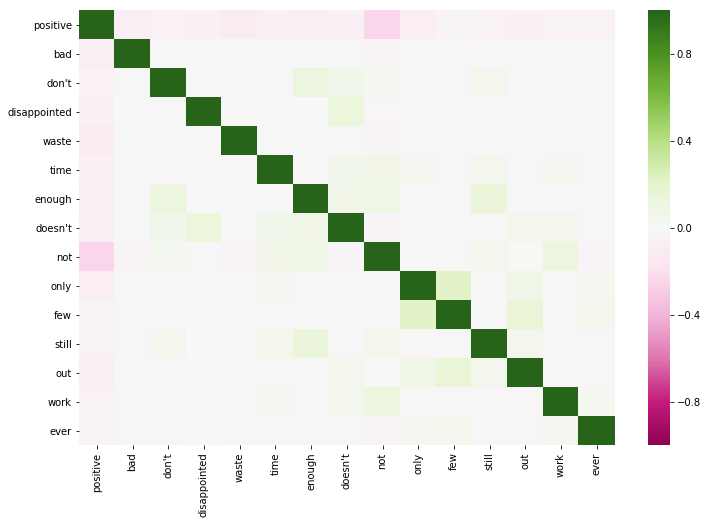

In [122]:
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t", names=['rev','positive'])
dfn = pd.DataFrame(df)

key_neg = ['bad', 'don\'t', 'disappointed', 'waste',  'time', 'enough', 'doesn\'t',  'not',
          'only', 'few', 'still', 'out', 'work', 'ever']

for key in key_neg:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    dfn[str(key)] = dfn.rev.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

plt.figure(figsize=(12,8))
sns.heatmap(dfn.corr(), vmin=-1, cmap="PiYG")
plt.show()

In [71]:
dfn['positive'] = (dfn.positive == 1)

inputn = dfn[key_neg]
goaln = dfn['positive']

neg = BernoulliNB()

neg.fit(inputn, goaln)

n_pred = neg.predict(inputn)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    inputn.shape[0],
    (goaln != n_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 372


In [72]:
# Evaluate the negative classifier
confusion_convention = [
    ["True Negative", "False Positive"],
    ["False Negative", "True Positive"]
]

for x in confusion_convention:
    print(x)

confusion_matrix(goalp,n_pred)

['True Negative', 'False Positive']
['False Negative', 'True Positive']


array([[177, 323],
       [ 49, 451]], dtype=int64)

In [73]:

trupos = ((goalp == n_pred) & (n_pred==1)).sum()
falpos = ((goalp != n_pred) & (n_pred==1)).sum()
truneg = ((goalp == n_pred) & (n_pred==0)).sum()
falneg = ((goalp != n_pred) & (n_pred==0)).sum()

sensitivity = trupos/(trupos+falneg)
specificity = truneg/(truneg+falpos)


print("Sensitivity: Accuracy predicting negative reviews: " + str(sensitivity))
print("Specificity: Accuracy predicting positive reviews: " + str(specificity))

cross_val_score(neg, inputn, goaln, cv=5)

Sensitivity: Accuracy predicting negative reviews: 0.902
Specificity: Accuracy predicting positive reviews: 0.354


array([0.635, 0.62 , 0.59 , 0.62 , 0.645])

In [74]:
#Slightly better but still labelling a LOT of positive reviews as negative for some reason.
#Let's try the same exercise with the positive classifier.

# Next attempt: identify words that are common in only positive reviews, build out additional keywords to attempt to reduce false negatives in the positive classifier


In [75]:
#Find most common words in positive reviews
col.Counter(" ".join(df[df.positive==True]["rev"]).split()).most_common(100)

[('the', 192),
 ('and', 186),
 ('I', 146),
 ('is', 139),
 ('a', 100),
 ('to', 85),
 ('it', 71),
 ('this', 68),
 ('my', 66),
 ('for', 62),
 ('with', 62),
 ('very', 58),
 ('phone', 53),
 ('of', 49),
 ('The', 45),
 ('on', 43),
 ('good', 40),
 ('have', 37),
 ('It', 37),
 ('was', 35),
 ('in', 33),
 ('This', 32),
 ('great', 32),
 ('Great', 30),
 ('that', 29),
 ('works', 28),
 ('has', 23),
 ('headset', 22),
 ('are', 21),
 ('quality', 21),
 ('one', 21),
 ('so', 21),
 ('sound', 20),
 ('as', 20),
 ("I've", 19),
 ('recommend', 18),
 ('like', 18),
 ('than', 18),
 ('but', 18),
 ('you', 17),
 ('had', 17),
 ('from', 16),
 ('phone.', 16),
 ('love', 16),
 ('great.', 15),
 ('Works', 15),
 ('best', 15),
 ('well', 15),
 ('would', 15),
 ('any', 14),
 ('all', 14),
 ('-', 14),
 ('your', 14),
 ('Good', 13),
 ('use', 13),
 ('product', 13),
 ('not', 13),
 ('it.', 13),
 ('Excellent', 12),
 ('battery', 12),
 ('well.', 12),
 ('been', 12),
 ('happy', 12),
 ('really', 12),
 ('am', 12),
 ('can', 11),
 ('up', 11),
 ('

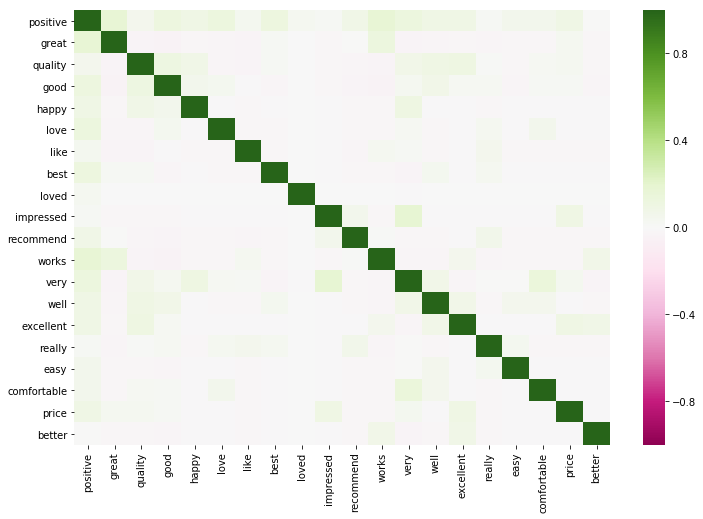

In [87]:
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t", names=['rev','positive'])
dfp = pd.DataFrame(df)

key_pos = ['great', 'quality', 'good', 'happy', 'love', 'like', 'best', 'loved', 'impressed', 'recommend', 'works', 'very',
           'well', 'excellent', 'really', 'easy', 'comfortable', 'price', 'better']

for key in key_pos:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    dfp[str(key)] = dfp.rev.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
dfp['positive'] = (dfp.positive == 1)
plt.figure(figsize=(12,8))    
sns.heatmap(dfp.corr(), vmin=-1, cmap="PiYG")
plt.show()



In [80]:
inputp = dfp[key_pos]
goalp = dfp['positive']

pos = BernoulliNB()

pos.fit(inputp, goalp)

p_pred = pos.predict(inputp)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    inputp.shape[0],
    (goalp != p_pred).sum()
))



Number of mislabeled points out of a total 1000 points : 325


In [82]:
confusion_convention = [
    ["True Negative", "False Positive"],
    ["False Negative", "True Positive"]
]

for x in confusion_convention:
    print(x)
confusion_matrix(goalp,p_pred)

['True Negative', 'False Positive']
['False Negative', 'True Positive']


array([[443,  57],
       [268, 232]], dtype=int64)

In [83]:
trupos = ((goalp == p_pred) & (p_pred==1)).sum()
falpos = ((goalp != p_pred) & (p_pred==1)).sum()
truneg = ((goalp == p_pred) & (p_pred==0)).sum()
falneg = ((goalp != p_pred) & (p_pred==0)).sum()


sensitivity = trupos/(trupos+falneg)
specificity = truneg/(truneg+falpos)

print("Sensitivity: Accuracy predicting positive reviews: " + str(sensitivity))
print("Specificity: Accuracy predicting negative reviews: " + str(specificity))

Sensitivity: Accuracy predicting positive reviews: 0.464
Specificity: Accuracy predicting negative reviews: 0.886


In [86]:
cross_val_score(pos, inputp, goalp, cv=5)

array([0.65 , 0.675, 0.655, 0.695, 0.665])

Still not ideal, but this is the best I've done at 68% accuracy and I'm still not at 50% sensitivity.

# Next attempt: remove some of the features that are not as strongly correlated with the positive column, add length of review and exclamation points

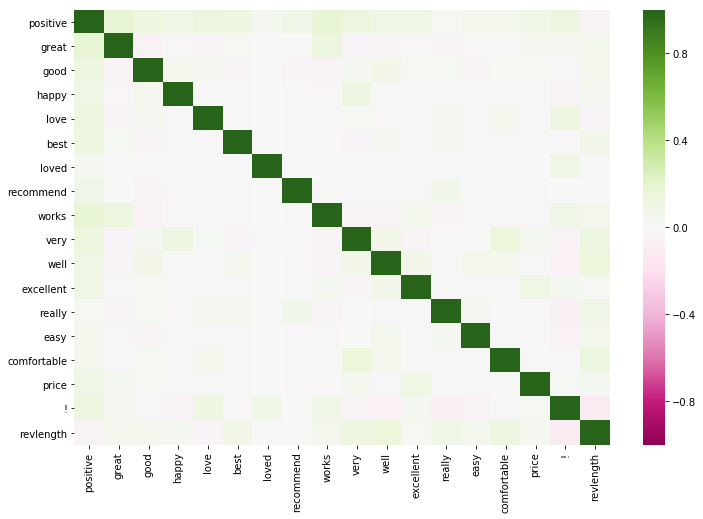

In [112]:
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t", names=['rev','positive'])
dfp = pd.DataFrame(df)

key_pos = ['great',  'good', 'happy', 'love', 'best', 'loved', 'recommend', 'works', 'very',
           'well', 'excellent', 'really', 'easy', 'comfortable', 'price']
keypun_pos = ['!']

for key in key_pos:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    dfp[str(key)] = dfp.rev.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
for keypun in keypun_pos:
    dfp[str(keypun)] = dfp.rev.str.contains(str(keypun), case=False, regex=False)

dfp['revlength'] = dfp['rev'].str.len()
dfp['positive'] = (dfp.positive == 1)
plt.figure(figsize=(12,8))    
sns.heatmap(dfp.corr(), vmin=-1, cmap="PiYG")
plt.show()

In [117]:
inputp = dfp[key_pos + keypun_pos]
goalp = dfp['positive']

pos = BernoulliNB()

pos.fit(inputp, goalp)

p_pred = pos.predict(inputp)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    inputp.shape[0],
    (goalp != p_pred).sum()
))



Number of mislabeled points out of a total 1000 points : 311


In [118]:
confusion_convention = [
    ["True Negative", "False Positive"],
    ["False Negative", "True Positive"]
]

for x in confusion_convention:
    print(x)
confusion_matrix(goalp,p_pred)

['True Negative', 'False Positive']
['False Negative', 'True Positive']


array([[420,  80],
       [231, 269]], dtype=int64)

In [119]:
trupos = ((goalp == p_pred) & (p_pred==1)).sum()
falpos = ((goalp != p_pred) & (p_pred==1)).sum()
truneg = ((goalp == p_pred) & (p_pred==0)).sum()
falneg = ((goalp != p_pred) & (p_pred==0)).sum()


sensitivity = trupos/(trupos+falneg)
specificity = truneg/(truneg+falpos)

print("Sensitivity: Accuracy predicting positive reviews: " + str(sensitivity))
print("Specificity: Accuracy predicting negative reviews: " + str(specificity))

Sensitivity: Accuracy predicting positive reviews: 0.538
Specificity: Accuracy predicting negative reviews: 0.84


In [121]:
cross_val_score(pos, inputp, goalp, cv=5)

array([0.715, 0.685, 0.685, 0.7  , 0.66 ])

# Final attempt takes the strongest correlations from each types and combines them into one

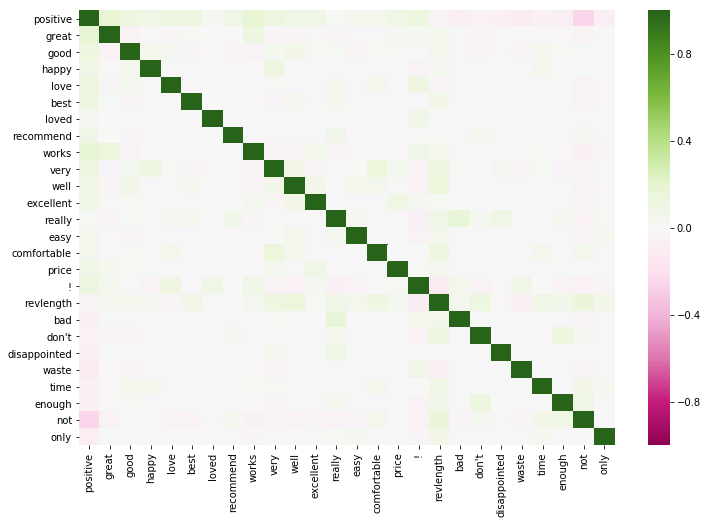

In [123]:
df = pd.read_csv('amazon_cells_labelled.txt',delimiter="\t", names=['rev','positive'])
dfc = pd.DataFrame(df)

key_pos = ['great',  'good', 'happy', 'love', 'best', 'recommend', 'works', 'very',
           'well', 'excellent', 'easy', 'comfortable', 'price', 'bad', 'don\'t', 'disappointed', 'waste',  'time', 'enough', 
           'not', 'only']
keypun_pos = ['!']

for key in key_pos:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    dfp[str(key)] = dfp.rev.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
for keypun in keypun_pos:
    dfp[str(keypun)] = dfp.rev.str.contains(str(keypun), case=False, regex=False)

dfp['revlength'] = dfp['rev'].str.len()
dfp['positive'] = (dfp.positive == 1)
plt.figure(figsize=(12,8))    
sns.heatmap(dfp.corr(), vmin=-1, cmap="PiYG")
plt.show()

In [124]:
inputp = dfp[key_pos + keypun_pos]
goalp = dfp['positive']

pos = BernoulliNB()

pos.fit(inputp, goalp)

p_pred = pos.predict(inputp)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    inputp.shape[0],
    (goalp != p_pred).sum()
))



Number of mislabeled points out of a total 1000 points : 288


In [125]:
confusion_convention = [
    ["True Negative", "False Positive"],
    ["False Negative", "True Positive"]
]

for x in confusion_convention:
    print(x)
confusion_matrix(goalp,p_pred)

['True Negative', 'False Positive']
['False Negative', 'True Positive']


array([[448,  52],
       [236, 264]], dtype=int64)

In [126]:
trupos = ((goalp == p_pred) & (p_pred==1)).sum()
falpos = ((goalp != p_pred) & (p_pred==1)).sum()
truneg = ((goalp == p_pred) & (p_pred==0)).sum()
falneg = ((goalp != p_pred) & (p_pred==0)).sum()


sensitivity = trupos/(trupos+falneg)
specificity = truneg/(truneg+falpos)

print("Sensitivity: Accuracy predicting positive reviews: " + str(sensitivity))
print("Specificity: Accuracy predicting negative reviews: " + str(specificity))

Sensitivity: Accuracy predicting positive reviews: 0.528
Specificity: Accuracy predicting negative reviews: 0.896


In [127]:
cross_val_score(pos, inputp, goalp, cv=5)

array([0.745, 0.695, 0.695, 0.72 , 0.675])

# Summary of attempts

**Negative attempt 1:**
- features = ['bad', 'not', 'disappointed', 'problems', 'waste', 'cheap']
- Accuracy: 606/1000 = 61% 
- Sensitivity: 97%
- Specificity: 24%
- accuracy over 5 folds: [.62, .605, .58, .595, .605]


**Positive attempt 1:** 

- features = ['great', 'quality', 'good', 'happy', 'love', 'like', 'best', 'loved', 'impressed', 'recommend', 'Works']
- Accuracy: 642/1000 = 64% 
- Sensitivity: 37%
- Specificity: 91%
- accuracy over 5 folds: [0.645, 0.645, 0.635, 0.63 , 0.625]

**Negative attempt 2:**

- features = ['bad', 'don\'t', 'disappointed', 'waste',  'time', 'enough', 'doesn\'t',  'not','only', 'few', 'still', 'out', 'work', 'ever']
- Accuracy: 628/1000 = 63% 
- Sensitivity: 90%
- Specificity: 35%
- accuracy over 5 folds: [0.635, 0.62 , 0.59 , 0.62 , 0.645]

**Positive attempt 2:**

- features = ['great', 'quality', 'good', 'happy', 'love', 'like', 'best', 'loved', 'impressed', 'recommend', 'works', 'very','well', 'excellent', 'really', 'easy', 'comfortable', 'price', 'better']
- Accuracy: 675/1000 = 68% 
- Sensitivity: 46%
- Specificity: 89%
- accuracy over 5 folds: [0.65 , 0.675, 0.655, 0.695, 0.665]

**Positive attempt 3:**

- features = ['great',  'good', 'happy', 'love', 'best', 'loved', 'recommend', 'works', 'very','well', 'excellent', 'really', 'easy', 'comfortable', 'price', '!', dfp.revlength (review length)]
- Accuracy: 689/1000 = 69% 
- Sensitivity: 54%
- Specificity: 84%
- accuracy over 5 folds: [0.65 , 0.675, 0.655, 0.695, 0.665]

**Merged Attempt:**

- features: ['great',  'good', 'happy', 'love', 'best', 'recommend', 'works', 'very','well', 'excellent', 'easy', 'comfortable', 'price', 'bad', 'don\'t', 'disappointed', 'waste',  'time', 'enough','not', 'only', '!', dfp.revlength (review length)]
- Accuracy: 712/1000 = 71% 
- Sensitivity: 53%
- Specificity: 90%
- accuracy over 5 folds: [0.745, 0.695, 0.695, 0.72 , 0.675]
  

# Recap
The merged attempt seems to overfit a bit more than the others, which makes sense given how many features it's using. 
Positive attempt #3 seems to be the best at a glance, achieving decent accuracy wihtout overfitting too badly. The most impactful features seem to be the simplest sentiment words: good, great, not, bad. 